### Exercício de classificação com SKLearn
#### Classificação se o serviço solicitado com base nas horas desempenhadas e preço, o/a design irá raelizar

In [26]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [27]:
# Alterando os nomes das colunas
mapa = {"unfinished" : "nao_finalizado",
        "expected_hours" : "horas_esperadas",
        "price" : "preco"}
dados = dados.rename(columns = mapa)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [28]:
# Como há a coluna não finalizados, interessante criar a finalizados a título de usuabilidade 
# assim, adicionaremos a coluna com valores contrários da não finalizadas e usaremos a nova coluna

troca = {1 : 0,
         0 : 1}
dados['finalizados'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

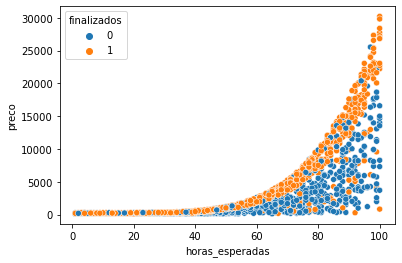

In [29]:
import seaborn as sns
# utilizamos o 'hue' (da o tom (cor)) para identificar dentro de horas_esperadas x preco, os serviços que foram 
# finalizados ou não
sns.scatterplot(x = 'horas_esperadas', y = 'preco', hue = 'finalizados', data = dados)

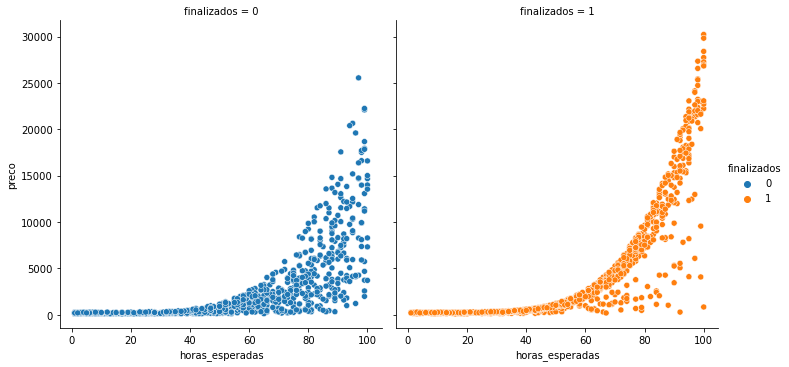

In [30]:
# Queremos fragmentar o plot em dois, no caso, um para finalizados 0 e finalizados 1
# no caso, adicionamos o 'col' (colunas) e o parametro a ser fragmentado e demos o tom (cor)
# também
sns.relplot(x = 'horas_esperadas', y = 'preco', hue = 'finalizados', col = 'finalizados', data = dados)

In [31]:
# separando os dados em x e y para treinar o modelo
x = dados [['horas_esperadas', 'preco']]
y = dados['finalizados']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Definição de números aleatórios
SEED = 20

# Separando os dados em treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos'%(len(treino_x), len(teste_x)))

# Realização do treino e a predição
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

# Taxa de acerto
acuracia = accuracy_score(teste_y, previsoes)*100
print('A acurácia foi de %.2f%%'%acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 56.48%


C:\Users\mathe\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
